# Kaggle Weather Data Analysis and Modeling

**Mark Wilber**


<font color='darkgreen'>**As thise notebook is lengthy, readers will find it much easier to navigate with [Jupyter Nbextensions](https://github.com/ipython-contrib/jupyter_contrib_nbextensions) installed, and Table of Contents (2) selected:**</font>

## Preliminaries

**Next two lines are useful in the event of external code changes.**

In [1]:
%load_ext autoreload
%autoreload 2

### Python imports

**Next two lines are for pretty output for all prints in a Pandas cell, not just the last.**

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**`utility` contains generally helpful data science stuff, while `plotHelpers` includes plot functions specifically.**

In [3]:
import sys
sys.path.append('/home/wilber/work/Mlib')
from utility import DataSci as util
import plotHelpers as ph

In [4]:
from time import time, asctime, gmtime
print(asctime(gmtime()))

t0 = time()

# from platform import node
import os
from os.path import exists
# import shutil
# from glob import glob
from random import random
from collections import Counter, OrderedDict
import gc		# garbage collection module
import pprint
# import pickle
import timeit

print("Python version: ", sys.version_info[:])
print("Un-versioned imports:\n")
if 'sys' in sys.modules:
    print('sys', end="")
if 'utility' in sys.modules:
    print(', utility', end="")
if 'plotHelpers' in sys.modules:
    print(', plotHelpers', end="")
if 'platform' in sys.modules:
    print(', platform', end="")
if 'os' in sys.modules:
    print(', os', end="")
if 'os.path' in sys.modules:
    print(', os.path', end="")
if 'shutil' in sys.modules:
    print(', shutil', end="")
if 'glob' in sys.modules:
    print(', glob', end="")
if 'random' in sys.modules:
    print(', random', end="")
if 'collections' in sys.modules:
    print(', collections', end="")
if 'gc' in sys.modules:
    print(', gc', end="")
if 'pprint' in sys.modules:
    print(', pprint', end="")
if 'pickle' in sys.modules:
    print(', pickle', end="")
if 'timeit' in sys.modules:
    print(', timeit', end="")

from dateutil import __version__ as duVersion
from dateutil.parser import parse
import numpy as np
import pandas as pd
# import pyreadr
import scaleogram as scg

from scipy import __version__ as scVersion
import scipy.sparse as sp

from sklearn import __version__ as skVersion
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import ComplementNB

from joblib import __version__ as jlVersion
from joblib import dump, load

import seaborn as sns
import colorcet as cc
from matplotlib import __version__ as mpVersion
import matplotlib.pyplot as plt

print("\n")
if 'dateutil' in sys.modules:
    print("dateutil: {0}".format(duVersion), end="\t")
if 'numpy' in sys.modules:
    print("numpy: {0}".format(np.__version__), end="\t")
if 'pandas' in sys.modules:
    print("pandas: {0}".format(pd.__version__), end="\t")
if 'pyreader' in sys.modules:
    print("pyreader: {0}".format(pyreader.__version__), end="\t")
if 'scipy' in sys.modules:
    print("scipy: {0}".format(scVersion), end="\t")
if 'scaleogram' in sys.modules:
    print("scaleogram: {0}".format(scg.__version__), end="\t")
# if 'tensorflow' in sys.modules:
#     print("tensorflow: {0}".format(tfVersion), end="\t")
# if 'keras' in sys.modules:
#     print("keras: {0}".format(kerVersion), end="\t")
if 'sklearn' in sys.modules:
    print("sklearn: {0}".format(skVersion), end="\t")
if 'joblib' in sys.modules:
    print("joblib: {0}".format(jlVersion), end="\t")
if 'seaborn' in sys.modules:
    print("seaborn: {0}".format(sns.__version__), end="\t")
if 'colorcet' in sys.modules:
    print("colorcet: {0}".format(cc.__version__), end="\t")
if 'matplotlib' in sys.modules:
    print("matplotlib: {0}".format(mpVersion), end="\t")
# if '' in sys.modules:
#     print(": {0}".format(.__version__), end="\t")
Δt = time() - t0
print(f"\n\nΔt: {Δt: 4.1f}s.")

%matplotlib inline

Tue Sep 17 01:41:38 2019
Python version:  (3, 7, 4, 'final', 0)
Un-versioned imports:

sys, utility, plotHelpers, platform, os, os.path, shutil, glob, random, collections, gc, pprint, pickle, timeit

dateutil: 2.8.0	numpy: 1.16.4	pandas: 0.24.2	scipy: 1.3.0	scaleogram: 0.9.5	sklearn: 0.21.2	joblib: 0.11	seaborn: 0.9.0	colorcet: 1.0.0	matplotlib: 3.1.0	

Δt:  1.7s.


### Nino 3 data  set

#### Load data

#### Set the scales

* 
* 

In [11]:
np.logspace(np.log10(0.7), np.log10(34.0), num=200)
np.log10(0.7), np.log10(34.0)

array([ 0.7       ,  0.71379305,  0.72785789,  0.74219986,  0.75682443,
        0.77173717,  0.78694376,  0.80244998,  0.81826174,  0.83438507,
        0.85082609,  0.86759107,  0.8846864 ,  0.90211857,  0.91989424,
        0.93802017,  0.95650325,  0.97535054,  0.9945692 ,  1.01416654,
        1.03415005,  1.05452731,  1.07530609,  1.09649431,  1.11810003,
        1.14013147,  1.16259703,  1.18550526,  1.20886488,  1.23268479,
        1.25697405,  1.28174192,  1.30699782,  1.33275138,  1.35901239,
        1.38579086,  1.41309698,  1.44094115,  1.46933397,  1.49828625,
        1.52780902,  1.55791352,  1.58861121,  1.61991377,  1.65183314,
        1.68438145,  1.7175711 ,  1.75141474,  1.78592525,  1.82111576,
        1.85699968,  1.89359067,  1.93090266,  1.96894985,  2.00774675,
        2.04730811,  2.087649  ,  2.12878479,  2.17073113,  2.21350399,
        2.25711967,  2.30159477,  2.34694622,  2.39319129,  2.44034759,
        2.48843307,  2.53746605,  2.58746519,  2.63844954,  2.69

(-0.1549019599857432, 1.5314789170422551)

#### Plot scaleogram

array([  2.23872114,   2.29511272,   2.35292476,   2.41219304,
         2.47295424,   2.53524597,   2.59910677,   2.66457618,
         2.7316947 ,   2.80050389,   2.87104633,   2.94336568,
         3.01750669,   3.09351525,   3.17143841,   3.25132439,
         3.33322263,   3.41718382,   3.50325993,   3.59150423,
         3.68197133,   3.77471722,   3.8697993 ,   3.96727643,
         4.06720893,   4.16965865,   4.27468899,   4.38236496,
         4.49275321,   4.60592204,   4.72194151,   4.84088341,
         4.96282137,   5.08783084,   5.2159892 ,   5.34737577,
         5.48207185,   5.62016083,   5.76172815,   5.90686145,
         6.05565053,   6.20818749,   6.36456673,   6.52488504,
         6.68924164,   6.85773825,   7.03047915,   7.20757126,
         7.38912417,   7.57525026,   7.76606471,   7.96168563,
         8.16223407,   8.36783418,   8.57861318,   8.79470154,
         9.01623299,   9.24334463,   9.47617704,   9.71487431,
         9.95958416,  10.21045807,  10.46765128,  10.73

(1870, 2000)

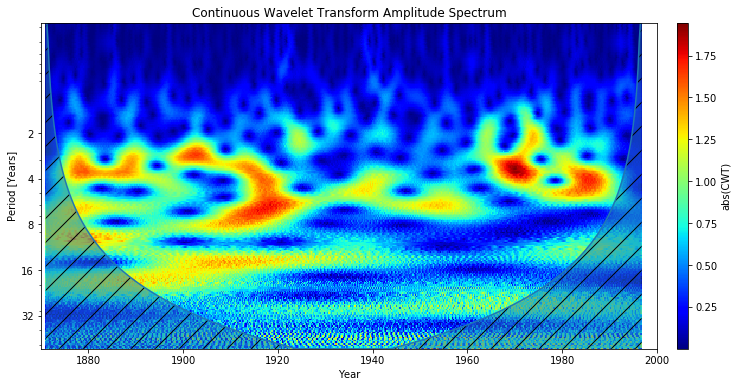

In [12]:
scales = np.logspace(0.35, 2.5, num=200)
scales
# scales = np.arange(15,600, 4)
ax = scg.cws(year, nino3, scales, figsize=(12,6), ylabel="Period [Years]", xlabel='Year', yscale='log')
ax.set_xlim([1870, 2000])
ticks = ax.set_yticks([2,4,8, 16,32])
ticks = ax.set_yticklabels([2,4,8, 16,32])

## Handle the data

### Read data into a DataFrame

**About the data**

* hourly data for 36 cities
* distinct files for humidity, pressure, temperature, wind speed, wind direction and descriptions of the weather
* Need to join data to produce single DataFrame

In [13]:
humidityFile = 'humidity.csv'
pressureFile = 'pressure.csv'
tempFile = 'temperature.csv'
windDirFile = 'wind_direction.csv'
windSpeedFile = 'wind_speed.csv'
descriptionFile = 'weather_description.csv'
cityAttributesFile = 'city_attributes.csv'

In [14]:
dfh = pd.read_csv(humidityFile)
dfh.head().T
dfh.tail().T

,0,1,2,3,4
datetime,2012-10-01 12:00:00,2012-10-01 13:00:00,2012-10-01 14:00:00,2012-10-01 15:00:00,2012-10-01 16:00:00
Vancouver,NaN,76,76,76,77
Portland,NaN,81,80,80,80
San Francisco,NaN,88,87,86,85
Seattle,NaN,81,80,80,79
Los Angeles,NaN,88,88,88,88
San Diego,NaN,82,81,81,81
Las Vegas,NaN,22,21,21,21
Phoenix,NaN,23,23,23,23
Albuquerque,NaN,50,49,49,49


,45248,45249,45250,45251,45252
datetime,2017-11-29 20:00:00,2017-11-29 21:00:00,2017-11-29 22:00:00,2017-11-29 23:00:00,2017-11-30 00:00:00
Vancouver,NaN,NaN,NaN,NaN,NaN
Portland,81,71,71,71,76
San Francisco,NaN,NaN,NaN,NaN,NaN
Seattle,93,87,93,87,75
Los Angeles,24,21,23,14,56
San Diego,72,72,68,63,72
Las Vegas,18,18,17,17,17
Phoenix,68,73,60,33,23
Albuquerque,37,34,32,30,34


In [15]:
dfh.datetime = pd.to_datetime(dfh.datetime)
dfh.describe(percentiles=[0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50,
                          0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95]).T

,count,mean,std,min,5%,10%,15%,20%,25%,30%,...,55.0%,60%,65%,70%,75%,80%,85%,90%,95%,max
Vancouver,43427.0,81.895480,14.522221,12.0,54.0,62.0,67.0,71.0,73.0,76.0,...,87.0,87.0,91.0,93.0,93.0,93.0,96.0,100.0,100.0,100.0
Portland,44804.0,74.697616,19.042656,10.0,38.0,46.0,52.0,58.0,63.0,67.0,...,81.0,84.0,87.0,87.0,90.0,93.0,93.0,96.0,99.0,100.0
San Francisco,44311.0,76.875042,17.396016,6.0,42.0,53.0,59.0,64.0,68.0,71.0,...,82.0,83.0,87.0,87.0,89.0,93.0,94.0,97.0,100.0,100.0
Seattle,44964.0,77.159038,18.147464,13.0,42.0,50.0,56.0,61.0,66.0,70.0,...,82.0,86.0,87.0,91.0,93.0,93.0,96.0,99.0,100.0,100.0
Los Angeles,45101.0,62.773841,21.818042,5.0,22.0,29.0,37.0,43.0,48.0,53.0,...,69.0,72.0,76.0,77.0,81.0,82.0,87.0,88.0,93.0,100.0
San Diego,44909.0,67.784809,19.419307,5.0,29.0,41.0,49.0,54.0,56.0,60.0,...,72.0,76.0,77.0,80.0,82.0,84.0,87.0,91.0,95.0,100.0
Las Vegas,44411.0,31.937831,20.041855,5.0,8.0,10.0,12.0,14.0,16.0,18.0,...,30.0,32.0,35.0,39.0,43.0,48.0,54.0,62.0,73.0,100.0
Phoenix,43945.0,37.484424,21.662728,5.0,11.0,14.0,16.0,19.0,21.0,23.0,...,35.0,38.0,41.0,45.0,50.0,55.0,62.0,70.0,81.0,100.0
Albuquerque,44543.0,45.186157,23.336546,5.0,12.0,16.0,20.0,23.0,26.0,29.0,...,46.0,49.0,54.0,58.0,63.0,68.0,73.0,79.0,87.0,100.0
Denver,43445.0,53.022557,23.905392,5.0,16.0,21.0,26.0,29.0,33.0,37.0,...,56.0,60.0,64.0,69.0,73.0,76.0,81.0,86.0,92.0,100.0


In [16]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
datetime             45253 non-null datetime64[ns]
Vancouver            43427 non-null float64
Portland             44804 non-null float64
San Francisco        44311 non-null float64
Seattle              44964 non-null float64
Los Angeles          45101 non-null float64
San Diego            44909 non-null float64
Las Vegas            44411 non-null float64
Phoenix              43945 non-null float64
Albuquerque          44543 non-null float64
Denver               43445 non-null float64
San Antonio          44689 non-null float64
Dallas               44934 non-null float64
Houston              45132 non-null float64
Kansas City          44741 non-null float64
Minneapolis          44743 non-null float64
Saint Louis          43964 non-null float64
Chicago              44144 non-null float64
Nashville            44686 non-null float64
Indianapolis         44558 non-null float64
Atla

In [17]:
dfh['Δdt'] = (dfh['datetime'] - dfh.loc[0, 'datetime'])
dfh['year'] = dfh['Δdt']/np.timedelta64(1, 'Y')
dfh.head()
dfh.tail()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,Δdt,year
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,00:00:00,0.000000
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,...,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0,01:00:00,0.000114
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,...,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0,02:00:00,0.000228
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,...,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0,03:00:00,0.000342
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,...,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0,04:00:00,0.000456


,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,Δdt,year
45248,2017-11-29 20:00:00,NaN,81.0,NaN,93.0,24.0,72.0,18.0,68.0,37.0,...,64.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,1885 days 08:00:00,5.161867
45249,2017-11-29 21:00:00,NaN,71.0,NaN,87.0,21.0,72.0,18.0,73.0,34.0,...,59.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,1885 days 09:00:00,5.161981
45250,2017-11-29 22:00:00,NaN,71.0,NaN,93.0,23.0,68.0,17.0,60.0,32.0,...,66.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,1885 days 10:00:00,5.162096
45251,2017-11-29 23:00:00,NaN,71.0,NaN,87.0,14.0,63.0,17.0,33.0,30.0,...,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,1885 days 11:00:00,5.162210
45252,2017-11-30 00:00:00,NaN,76.0,NaN,75.0,56.0,72.0,17.0,23.0,34.0,...,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,1885 days 12:00:00,5.162324


In [18]:
PhoenixHumids = dfh[['datetime', 'year', 'Phoenix']]
PhoenixHumids.head()
PhoenixHumids.tail()

,datetime,year,Phoenix
0,2012-10-01 12:00:00,0.000000,NaN
1,2012-10-01 13:00:00,0.000114,23.0
2,2012-10-01 14:00:00,0.000228,23.0
3,2012-10-01 15:00:00,0.000342,23.0
4,2012-10-01 16:00:00,0.000456,23.0


,datetime,year,Phoenix
45248,2017-11-29 20:00:00,5.161867,68.0
45249,2017-11-29 21:00:00,5.161981,73.0
45250,2017-11-29 22:00:00,5.162096,60.0
45251,2017-11-29 23:00:00,5.162210,33.0
45252,2017-11-30 00:00:00,5.162324,23.0


In [19]:
N = PhoenixHumids.shape[0]
print(f"Phoenix humidity samples: {N}")

Phoenix humidity samples: 45253


### Plot Phoenix humidity time series

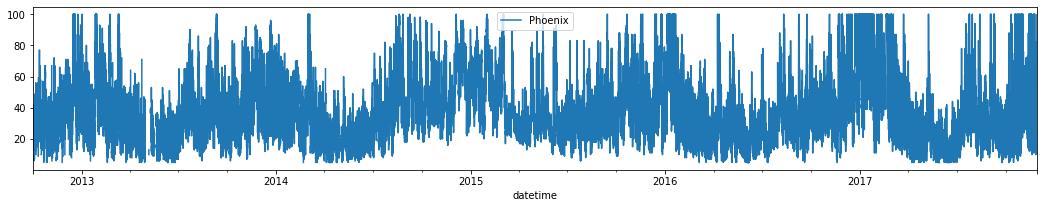

In [20]:
fig, axis = plt.subplots(1, 1, figsize=(18, 3))
PhoenixHumids.plot('datetime', 'Phoenix', ax=axis)

### Wavelet scaleograms

#### The Morlet wavelet transform

* This basis function essentially is a cosine with a Gaussian envelope

In [21]:
scg.set_default_wavelet('cmor1-1.5')

#### Example showing wavelet scaleograms of different periodic signals

(0, 1024)

Text(0.5, 1.0, 'cos wave with gaussian envelope')

NameError: name 'pywt' is not defined

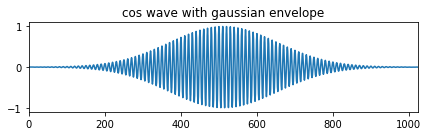

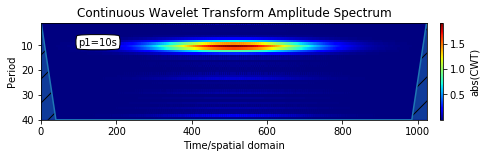

In [22]:
# let consider a timeline with 1 sample / second
ns   = 1024
time = np.arange(ns)

# and a range of scales to perform the transform
scales = scg.periods2scales( np.arange(1, 40) )

# and a periodic signal with varying amplitude
p1=10; periodic1 = np.cos(2*np.pi/p1*time) * np.exp(-((time-ns/2)/200)**2)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(6.2,2));  
lines = ax1.plot(periodic1); 
ax1.set_xlim(0, len(time))
ax1.set_title("cos wave with gaussian envelope")
fig1.tight_layout()

# and the scaleogram
ax2 = scg.cws(periodic1, scales=scales, figsize=(6.9,2.3)); 
txt = ax2.annotate("p1=10s", xy=(100, 10), bbox=dict(boxstyle="round4", fc="w"))
plt.tight_layout()

print("Default wavelet function used to compute the transform:", scg.get_default_wavelet(), "(",
      pywt.ContinuousWavelet(scg.get_default_wavelet()).family_name, ")")

In [ ]:
scale0 = 0.0002
scale1 = 2.0
# scales = np.logspace(0.35, 2.5, num=200)
scales = np.logspace(scale0, scale1, num=200)
years = PhoenixHumids[['year']].values.squeeze()
years[:30]
humidity = PhoenixHumids[['Phoenix']].values.squeeze()
humidity[:30]
ax = scg.cws(years, humidity, scales, figsize=(12,6), ylabel="time", xlabel='year', yscale='log')
# ticks = ax.set_yticks([2, 4, 8, 16, 32])
# ticks = ax.set_yticklabels([2, 4, 8, 16, 32])